In [1]:
pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
from game import *

def run_the_sim(game):
    return game.play_until_winner()

In [3]:
player_list = ["Player1", "Player2", "Player3", "Player4"]
strategies = ["strategy_1", "strategy_2", "strategy_3", "strategy_4"]

players = create_players(player_list, strategies)
game = Game(players)

win_counts = {player: 0 for player in player_list}
tie_count = 0
results = []

========================Starting a new game!========================


In [4]:
# Run 1,000 simulations
for i in range(0, 1000):
    winner = run_the_sim(game)
    if winner in win_counts:
        win_counts[winner] += 1
        results.append(winner)
    elif winner == "Tie":
        tie_count += 1
        #results.append("Tie")

========================Starting a new game!========================
selected guard
Player1 played the Guard card!
Player1 guessed wrong! Player2 does not have the Princess card.
Player2 played the Baron card!
Player3 eliminated in a Baron comparison!
Player4 played the King card!
Player1 played the Prince card!
Player2 redrew a card.
selected guard
Player2 played the Guard card!
card is <cards.Guard object at 0x16e124fb0>
Player2 guessed wrong! Player1 does not have the <cards.Priest object at 0x16e125010> card.
selected guard
Player4 played the Guard card!
Player4 guessed wrong! Player1 does not have the <cards.Princess object at 0x16e124ad0> card.
Player1 played the Handmaid card!
selected guard
Player2 played the Guard card!
card is <cards.Priest object at 0x16e125010>
Player2 guessed wrong! Player4 does not have the <cards.Handmaid object at 0x16e125040> card.
Player4 played the Baron card!
Player2 eliminated in a Baron comparison!
Player1 played the Handmaid card!
Player4 played 

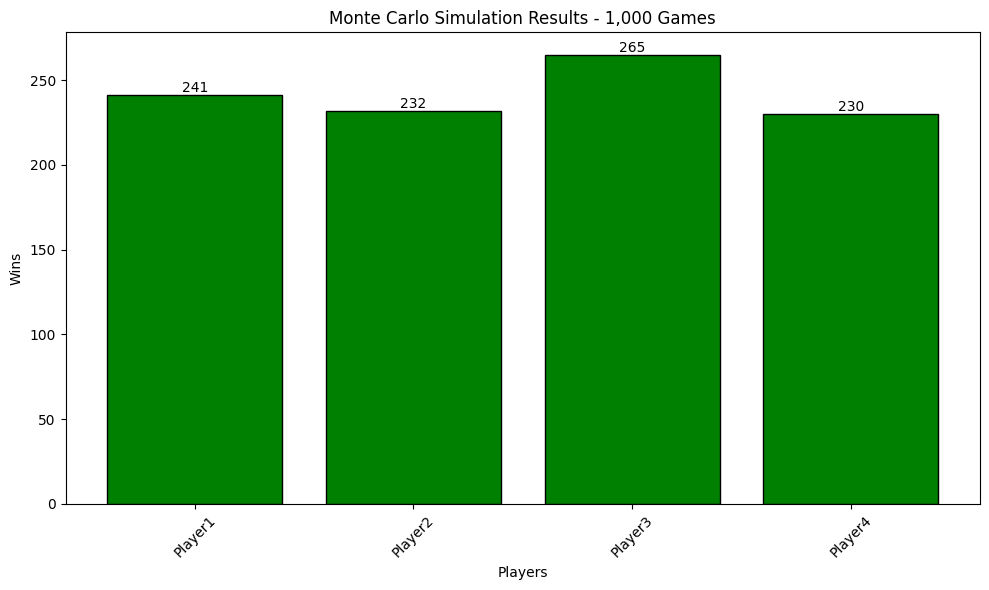

In [5]:
# Plotting for 1,000 simulations

player_counts = {player: results.count(player) for player in player_list}

plt.figure(figsize=(10, 6))
bars = plt.bar(player_counts.keys(), player_counts.values(), color='green', edgecolor='black')

for bar in bars:
    height = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontsize=10)

plt.title("Monte Carlo Simulation Results - 1,000 Games")
plt.xlabel("Players")
plt.ylabel("Wins")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [6]:
# Run for 10,000 simulations

#Reset for the new sims
game = Game(players)
win_counts = {player: 0 for player in player_list}
tie_count = 0
results = []

for i in range(0, 10000):
    winner = run_the_sim(game)
    if winner in win_counts:
        win_counts[winner] += 1
        results.append(winner)
    elif winner == "Tie":
        tie_count += 1
        results.append("Tie")

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



selected guard
Player4 played the Guard card!
Player4 guessed wrong! Player3 does not have the <cards.Handmaid object at 0x16e124c80> card.
Winner of this round: Player1 with the highest card value (7)!
========================Starting a new game!========================
selected guard
Player1 played the Guard card!
Player1 guessed wrong! Player2 does not have the Princess card.
selected guard
Player2 played the Guard card!
card is <cards.Guard object at 0x16e1256a0>
Player2 guessed wrong! Player4 does not have the <cards.Handmaid object at 0x16e124c80> card.
Player3 played the Countess card!
Player4 played the King card!
selected guard
Player1 played the Guard card!
Player1 guessed correctly! Player3 had the Princess card.
Player2 played the Prince card!
Player4 redrew a card.
selected guard
Player4 played the Guard card!
Player4 guessed wrong! Player2 does not have the <cards.Guard object at 0x1467cf6b0> card.
Player1 played the Prince card!
Player2 redrew a card.
selected guard
Play

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



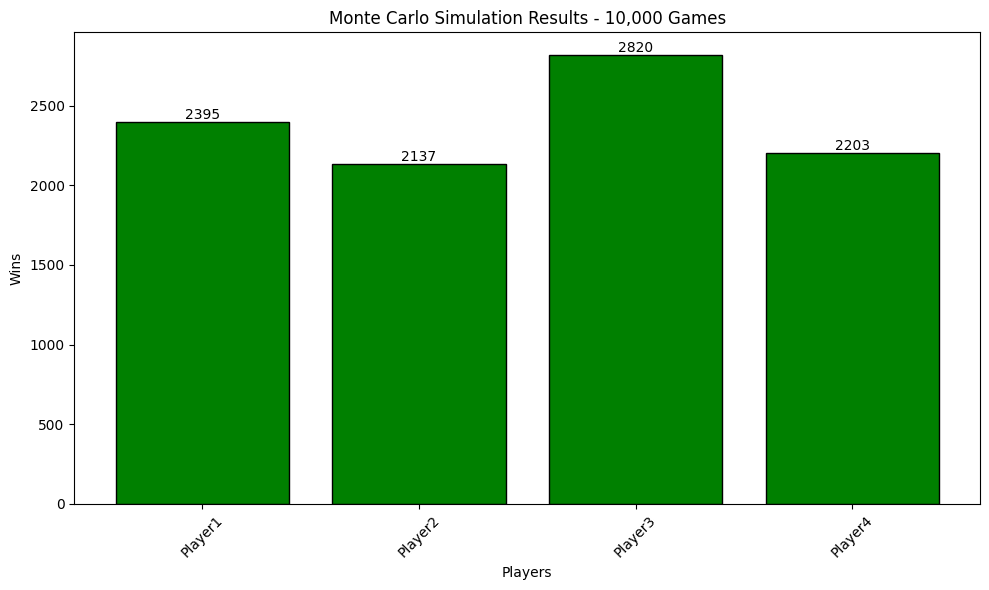

In [7]:
player_counts = {player: results.count(player) for player in player_list}

plt.figure(figsize=(10, 6))
bars = plt.bar(player_counts.keys(), player_counts.values(), color='green', edgecolor='black')

for bar in bars:
    height = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontsize=10)

plt.title("Monte Carlo Simulation Results - 10,000 Games")
plt.xlabel("Players")
plt.ylabel("Wins")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [8]:
def normalize(wins, num_games):
    return wins/num_games

normalized_results = []

def run_normalization(player_counts, results):
    for player_count in player_counts.items():
        normalized_results.append(normalize(player_count[1], len(results)))
    return normalized_results
    
    


In [14]:
print(normalized_results)

[]


In [9]:
# Run for 10,000 simulations

def run_sim(num_games):
    #Reset for the new sims
    game = Game(players)
    win_counts = {player: 0 for player in player_list}
    tie_count = 0
    results = []
    
    for i in range(0, num_games):
        winner = run_the_sim(game)
        if winner in win_counts:
            win_counts[winner] += 1
            results.append(winner)
        elif winner == "Tie":
            tie_count += 1
            results.append("Tie")
    player_counts = {player: results.count(player) for player in player_list}
    return player_counts, results

player_counts, results = run_sim(1000)
# print(player_counts, results)

normalized_results = run_normalization(player_counts, results)

print(normalized_results)


    

========================Starting a new game!========================
========================Starting a new game!========================
selected guard
Player1 played the Guard card!
Player1 guessed wrong! Player3 does not have the Princess card.
Player2 played the Prince card!
Player3 redrew a card.
selected guard
Player3 played the Guard card!
Priest
Player3 guessed wrong! Player1 does not have the Priest card.
Player4 played the Princess card!
Player4 eliminated for discarding the Princess!
selected guard
Player1 played the Guard card!
Player1 guessed wrong! Player2 does not have the Princess card.
Player2 played the Baron card!
Player1 eliminated in a Baron comparison!
Player3 played the King card!
selected guard
Player2 played the Guard card!
card is <cards.Handmaid object at 0x16e1ccce0>
Player2 guessed wrong! Player3 does not have the <cards.Prince object at 0x16e1ceab0> card.
Player3 played the Baron card!
Player2 eliminated in a Baron comparison!
Winner of this round: Player3

In [10]:
def run_multiple_sims(num_runs):
    player_counts, results = run_sim(num_runs)
    # print(player_counts, results)
    
    normalized_results = run_normalization(player_counts, results)
    return normalized_results


player1_results = []
player2_results = []
player3_results = []
player4_results = []
ties_results = []

def aggregate_normalized_result(normalized_result):
    for result in normalized_result:
        player1 = result[0]
        player2 = result[1]
        player3 = result[2]
        player4 = result[3]
        ties = result[4]
        player1_results.append(player1)
        player2_results.append(player2)
        player3_results.append(player3)
        player4_results.append(player4)
        ties_results.append(ties)
    return player1_results, player2_results, player3_results, player4_results, tie_results
        

            

normalized_results = []

import pandas as pd
df = pd.DataFrame()

df['i'] = ""
df['normalized_result'] = ""

for i in range(1, 100):
    normalized_result = run_multiple_sims(i)
    aggregated_normalized_result = aggregate_normalized_result(normalized_result)
    # normalized_results.append(normalized_result)
    df.loc['i'] = i
    df.loc['normalized_result'] = aggregated_normalized_result
    
    
    
# print(normalized_results)
    


    

========================Starting a new game!========================
========================Starting a new game!========================
Player1 played the Handmaid card!
selected guard
Player2 played the Guard card!
card is <cards.Guard object at 0x16e1957c0>
Player2 guessed wrong! Player4 does not have the <cards.Priest object at 0x16e25b6e0> card.
selected guard
Player3 played the Guard card!
Baron
Player3 guessed wrong! Player4 does not have the Baron card.
Player4 played the King card!
Player1 played the Priest card!
selected guard
Player2 played the Guard card!
card is <cards.Handmaid object at 0x16e259160>
Player2 guessed wrong! Player3 does not have the <cards.Baron object at 0x16e1dae40> card.
selected guard
Player3 played the Guard card!
Countess
Player3 guessed wrong! Player2 does not have the Countess card.
selected guard
Player4 played the Guard card!
Player4 guessed wrong! Player1 does not have the <cards.King object at 0x1049f5040> card.
Player1 played the Baron card!
P

TypeError: 'float' object is not subscriptable

In [ ]:
import matplotlib.pyplot as plt
plt.plot()